In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wood_winners = pd.read_csv(r'Golden_Ticket_Award_Winners_Wood.csv')
steel_winners = pd.read_csv(r'Golden_Ticket_Award_Winners_Steel.csv')

In [3]:
print(wood_winners.head())

   Rank          Name                       Park             Location  \
0     1  Boulder Dash             Lake Compounce       Bristol, Conn.   
1     2       El Toro  Six Flags Great Adventure        Jackson, N.J.   
2     3       Phoenix  Knoebels Amusement Resort        Elysburg, Pa.   
3     4    The Voyage              Holiday World    Santa Claus, Ind.   
4     5   Thunderhead                  Dollywood  Pigeon Forge, Tenn.   

           Supplier  Year Built  Points  Year of Rank  
0               CCI        2000    1333          2013  
1           Intamin        2006    1302          2013  
2  Dinn/PTC-Schmeck        1985    1088          2013  
3     Gravity Group        2006    1086          2013  
4              GCII        2004     923          2013  


In [4]:
print(steel_winners.head())

   Rank                Name                        Park           Location  \
0     1    Millennium Force                 Cedar Point     Sandusky, Ohio   
1     2             Bizarro       Six Flags New England      Agawam, Mass.   
2     3  Expedition GeForce                Holiday Park  Hassloch, Germany   
3     4               Nitro   Six Flags Great Adventure      Jackson, N.J.   
4     5    Apollo’s Chariot  Busch Gardens Williamsburg  Williamsburg, Va.   

  Supplier  Year Built  Points  Year of Rank  
0  Intamin        2000    1204          2013  
1  Intamin        2000    1011          2013  
2  Intamin        2001     598          2013  
3      B&M        2001     596          2013  
4      B&M        1999     542          2013  


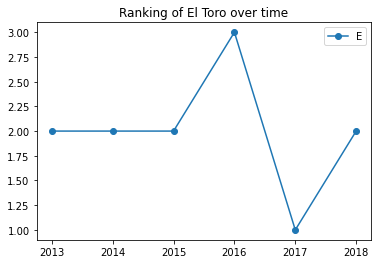

In [22]:
def ranking_tracker(name, park_name, df):
    years = df['Year of Rank'][(df.Name == name) & (df.Park == park_name)]
    coaster_rankings = df.Rank[(df.Name == name) & (df.Park == park_name)]
    plt.plot(years, coaster_rankings, marker = 'o')
    plt.legend(name)
    plt.title("Ranking of " + name + " over time")
    plt.show()
    
ranking_tracker('El Toro', "Six Flags Great Adventure", wood_winners)

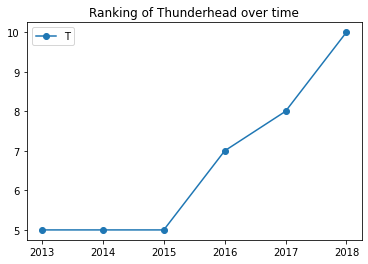

In [23]:
ranking_tracker('Thunderhead', "Dollywood", wood_winners)

In [20]:
print(wood_winners[(wood_winners.Name == "El Toro") & (wood_winners.Park == "Six Flags Great Adventure")])

     Rank     Name                       Park       Location Supplier  \
1       2  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   
11      2  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   
21      2  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   
32      3  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   
80      1  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   
131     2  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   

     Year Built  Points  Year of Rank  
1          2006    1302          2013  
11         2006    1291          2014  
21         2006    1464          2015  
32         2006    1121          2016  
80         2009    1241          2017  
131        2006    1197          2018  


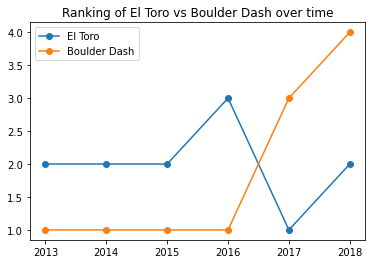

In [28]:
def ranking_tracker_compare(name1, park_name1, name2, park_name2, df):
    years1 = df['Year of Rank'][(df.Name == name1) & (df.Park == park_name1)]
    coaster_rankings1 = df.Rank[(df.Name == name1) & (df.Park == park_name1)]
    plt.plot(years1, coaster_rankings1, marker = 'o')
    years2 = df['Year of Rank'][(df.Name == name2) & (df.Park == park_name2)]
    coaster_rankings2 = df.Rank[(df.Name == name2) & (df.Park == park_name2)]
    plt.plot(years2, coaster_rankings2, marker = 'o')
    plt.legend([name1, name2])
    plt.title("Ranking of " + name1 + " vs " + name2 + " over time")
    plt.show()
    
ranking_tracker_compare('El Toro', "Six Flags Great Adventure", "Boulder Dash", "Lake Compounce", wood_winners)

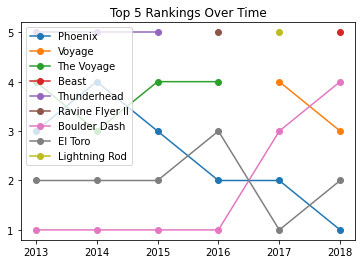

In [98]:
def ranking_tracker_topn(n, df):
    top_n_rankings = df[df['Rank'] <= n]
    ax = plt.subplot()

    for coaster in set(top_n_rankings['Name']):
        coaster_rankings = top_n_rankings[top_n_rankings['Name'] == coaster]
        ax.plot(coaster_rankings['Year of Rank'],coaster_rankings['Rank'],label=coaster, marker = 'o')
    plt.title("Top " + str(n) + " Rankings Over Time")    
    plt.legend()
    ax.set_yticks(range(1,n+1))
    plt.show()
    
    
ranking_tracker_topn(5, wood_winners)

In [38]:
roller_coasters = pd.read_csv('roller_coasters.csv')
print(roller_coasters.head())

            name material_type seating_type  speed  height  length  \
0       Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1  Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2     Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3       Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4         Azteka         Steel     Sit Down   55.0    17.0   500.0   

   num_inversions     manufacturer            park            status  
0             7.0           Vekoma    Parc Asterix  status.operating  
1             0.0           Vekoma   Bobbejaanland  status.operating  
2             0.0         Zamperla    Terra Mítica  status.operating  
3             0.0  William J. Cobb  Walygator Parc  status.operating  
4             0.0           Soquet          Le Pal  status.operating  


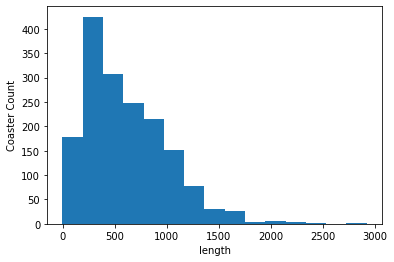

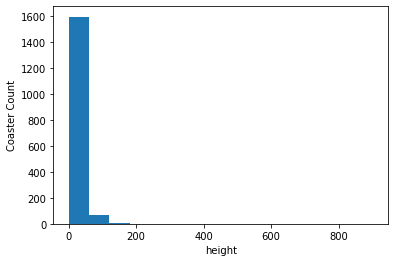

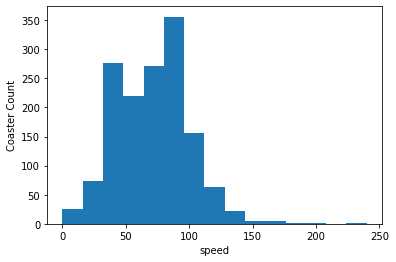

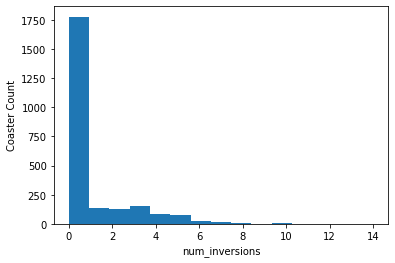

In [54]:
def histogramer(df, column_name):
    plt.hist(df[column_name], bins = 15)
    plt.ylabel('Coaster Count')
    plt.xlabel(str(column_name))
    plt.show()
    
histogramer(roller_coasters, 'length')
histogramer(roller_coasters, 'height')
histogramer(roller_coasters, 'speed')
histogramer(roller_coasters, 'num_inversions')

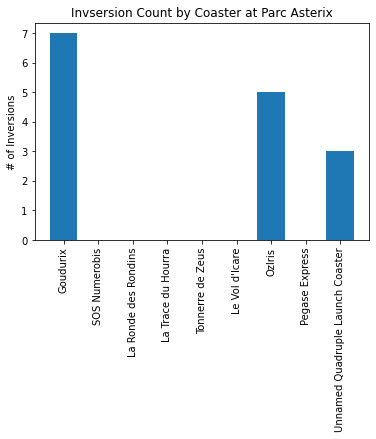

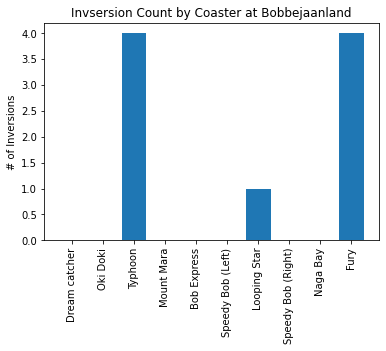

In [72]:
def inversion_bar(df, park_name):
    park_df = df[df.park == park_name]
    ax = plt.subplot()
    x_vals = range(len(park_df))
    y_vals = park_df.num_inversions.tolist()
    plt.bar(x_vals, y_vals)
    ax.set_xticks(x_vals)
    ax.set_xticklabels(park_df.name, rotation = 90)
    plt.ylabel('# of Inversions')
    plt.title("Invsersion Count by Coaster at " + park_name)
    plt.show()

inversion_bar(roller_coasters, "Parc Asterix")
inversion_bar(roller_coasters, "Bobbejaanland")

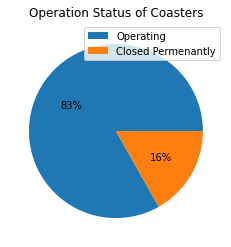

In [87]:
#print(roller_coasters.status.value_counts())

def operation_status_pie(df):
    operating_coasters = df[df['status'] == 'status.operating']
    closed_coasters = df[df['status'] == 'status.closed.definitely']
    status_counts = [len(operating_coasters), len(closed_coasters)]
    plt.pie(status_counts, autopct = '%d%%')
    labels = ["Operating", "Closed Permenantly"]
    plt.legend(labels)
    plt.title("Operation Status of Coasters")
    plt.show()
    
operation_status_pie(roller_coasters)    

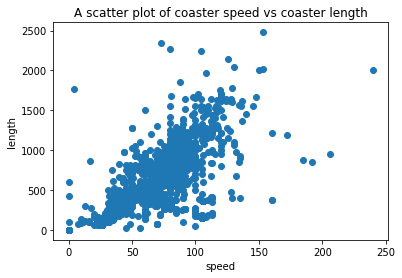

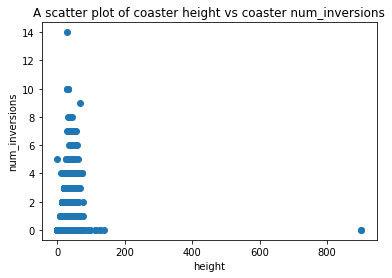

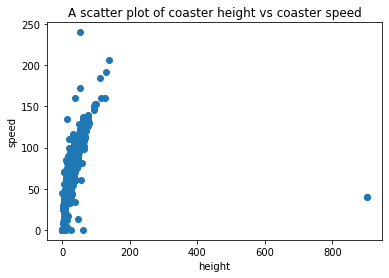

In [100]:
def scatter_two(df, col1, col2):
    x = df[col1]
    y = df[col2]
    plt.scatter(x, y)
    plt.xlabel(str(col1))
    plt.ylabel(str(col2))
    plt.title("A scatter plot of coaster " + str(col1) + " vs coaster " + str(col2))
    plt.show()
    
scatter_two(roller_coasters, 'speed', 'length')
scatter_two(roller_coasters, 'height', 'num_inversions')
scatter_two(roller_coasters, 'height', 'speed')

            index  seating_type
0        Sit Down          2217
1        Spinning           150
2        Inverted           122
3       Suspended            55
4          Alpine            43
5              na            40
6   Water Coaster            29
7       Floorless            27
8          Flying            27
9       Motorbike            21
10       Stand Up            20
11  4th Dimension            18
12           Wing            17
13      Bobsleigh            11
14       Pipeline             5


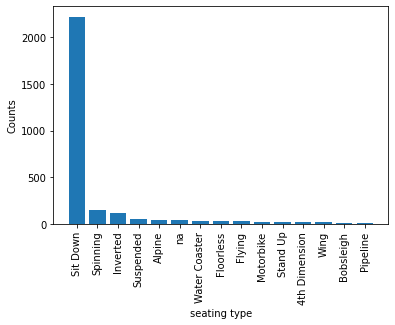

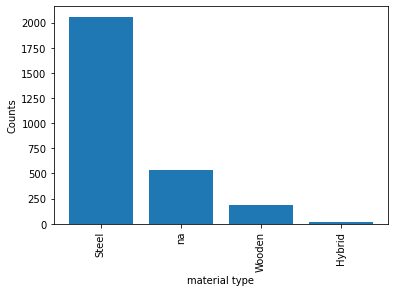

In [130]:
seating_type_count = roller_coasters.seating_type.value_counts()
#print(seating_type_count)
seating_type_count_df = pd.DataFrame(seating_type_count).reset_index()
print(seating_type_count_df)
#plt.bar(seating_type_count_df.index, seating_type_count_df.seating_type)
#plt.show()

def make_a_bar(df, cat_column):
    cat_column_count = df[cat_column].value_counts()
    cat_column_count_df = pd.DataFrame(cat_column_count).reset_index()
    cat_column_count_df = cat_column_count_df.rename(columns={"index": "categories"})
    plt.bar(cat_column_count_df.index, cat_column_count_df[cat_column])
    ax = plt.subplot()
    ax.set_xticks(range(len(cat_column_count_df)))
    ax.set_xticklabels(cat_column_count_df.categories, rotation = 90)
    plt.xlabel(str(cat_column).replace('_',' '))
    plt.ylabel("Counts")
    plt.show()
    
    
make_a_bar(roller_coasters, 'seating_type')
make_a_bar(roller_coasters, 'material_type')